In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn import mixture
from sklearn import cluster
from sklearn import metrics
from sklearn import manifold
from sklearn import model_selection
from sklearn import ensemble
import pickle
import warnings 
warnings.filterwarnings("ignore")

## ⭐️ Признаки в итоговой таблице:
* 'Среднедушевой доход, руб.мес./чел.', 
* 'Реальные доходы,руб.мес./чел.', 
* 'Начисленная з/п,руб.мес./чел.', 
* 'Реальная з/п, % к прошлому году/чел.', 
* 'Численность населения, чел.', 
* 'Кредитная задолженность, млн.руб./чел.', 
* 'Младенческая смертность, на тыс.чел.', 
* 'Количество безработных, %', 
* 'Количество школ, шт./1000 чел.',
* 'Продажа алкоголя, л.', 
* 'Валовый продукт, руб./чел.',
* 'Средняя жилая площадь на чел, м.кв.', 
* 'Ветхое жильё, м.кв.', 
* 'В очереди на переселение, чел.', 
* 'Общая заболеваемость, на 100тыс.чел.', 
* 'Врожденные пороки развития, на 100тыс.чел.', 
* 'Психические расстройства, на 100тыс.чел.',
* 'Подростковая беременность, на 100тыс.чел.', 
* 'Число больниц, ед.',
* 'Рождаемость, чел./1000 чел.',
* 'Бедность, %',
* 'Дети до 16 лет, чел.',
* 'Пенсионеры,чел.', 
* 'Трудящиеся, чел.',* 
* 'Региональный продукт, на тыс. чел.',   
* 'Розничная торговля на душу населения, руб./чел.',  
* 'Миграционный прирост, на тыс.чел',
* 'Алкоголизм, на тыс.чел',* 
* 'Наркомания, на тыс.чел,'

In [20]:
regions = pd.read_csv('social_data/regions_df.csv', index_col='region')
regions.head(3)

,Unnamed: 0,"Трудящиеся, чел.","Число больниц, ед.","Дети до 16 лет, чел.","Бедность, %","Розничная торговля на душу населения, руб./чел.","Пенсионеры,чел.","Алкоголизм, на тыс.чел","Региональный продукт, на тыс. чел.","Среднедушевой доход, руб.мес./чел.","Реальные доходы,руб.мес./чел.","Количество безработных, %","Миграционный прирост, на тыс.чел","Продажа алкоголя, л.","Наркомания, на тыс.чел","Средняя жилая площадь на чел, м.кв.","Количество школ, шт./1000 чел.","В очереди на переселение, чел.","Валовый продукт, руб./чел.","Врожденные пороки развития, на 100тыс.чел.","Ветхое жильё, м.кв.","Подростковая беременность, на 100тыс.чел.","Общая заболеваемость, на 100тыс.чел.","Рождаемость, чел./1000 чел.","Психические расстройства, на 100тыс.чел."
region,,,,,,,,,,,,,,,,,,,,,,,,,
Алтайский край,0,59.4,0.054667,31.4,17.50,151859.0,9.2,87.00,3.414504e+05,23192.25,98.700,2.987489,-2.352941,5.50795,17.40,18.0,0.689338,0.8642,260336.075,190.966667,0.3,5.000000,111208.65,9.621144,1397.933333
Амурская область,1,56.9,0.049632,38.4,15.80,223268.0,4.7,102.35,4.027777e+05,32238.25,101.375,2.921392,-2.710298,7.47955,21.55,17.3,0.683847,1.0731,471565.625,365.500000,1.3,13.366667,83665.50,10.708943,481.466667
Архангельская область без Ненецкого АО,2,64.3,0.053779,28.5,12.85,234360.5,7.2,60.00,1.719929e+06,32871.75,99.750,3.226712,-4.466555,8.58590,7.30,16.9,0.592243,1.2998,489821.025,421.200000,1.4,10.400000,100714.75,9.253748,674.933333


In [21]:
pd.set_option('display.max_columns', 500)
regions.describe()

,Unnamed: 0,"Трудящиеся, чел.","Число больниц, ед.","Дети до 16 лет, чел.","Бедность, %","Розничная торговля на душу населения, руб./чел.","Пенсионеры,чел.","Алкоголизм, на тыс.чел","Региональный продукт, на тыс. чел.","Среднедушевой доход, руб.мес./чел.","Реальные доходы,руб.мес./чел.","Количество безработных, %","Миграционный прирост, на тыс.чел","Продажа алкоголя, л.","Наркомания, на тыс.чел","Средняя жилая площадь на чел, м.кв.","Количество школ, шт./1000 чел.","В очереди на переселение, чел.","Валовый продукт, руб./чел.","Врожденные пороки развития, на 100тыс.чел.","Ветхое жильё, м.кв.","Подростковая беременность, на 100тыс.чел.","Общая заболеваемость, на 100тыс.чел.","Рождаемость, чел./1000 чел.","Психические расстройства, на 100тыс.чел."
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,8.700000e+01,87.000000,87.000000,86.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,41.908046,55.744828,0.045185,38.593103,14.248276,190125.135057,5.671264,66.179310,1.383616e+06,31152.497126,99.998563,3.080083,-0.282689,6.271153,10.443103,17.162069,0.548354,1.217941,6.483094e+05,228.972797,1.620690,13.406513,79719.891379,10.700967,506.985441
std,25.010059,5.996971,0.018703,6.781589,5.055133,53426.704075,3.649941,34.546049,2.540531e+06,13399.536842,1.602643,1.620077,5.093755,2.387834,9.261015,2.261880,0.239136,1.625427,9.028582e+05,150.065789,1.605306,24.494100,16872.711078,2.291855,204.112390
min,0.000000,42.300000,0.011937,19.000000,5.550000,49976.500000,0.300000,0.100000,2.035144e+04,16363.750000,96.575000,0.960931,-9.493139,0.138050,0.350000,13.600000,0.177880,0.000000,1.376303e+05,41.200000,0.000000,0.000000,45707.200000,7.607234,95.000000
25%,20.500000,51.550000,0.033972,33.950000,10.487500,155489.875000,2.950000,44.725000,3.801700e+05,23890.375000,98.725000,2.238863,-2.596024,5.199900,5.600000,15.800000,0.394436,0.000000,3.174255e+05,117.633333,0.600000,3.166667,67435.175000,9.253748,391.950000
50%,42.000000,54.700000,0.042481,39.200000,13.725000,186356.250000,5.000000,62.200000,7.390375e+05,27689.500000,99.650000,2.664838,-1.351898,6.268200,8.300000,16.900000,0.506797,0.607700,4.430201e+05,192.366667,1.200000,8.333333,76454.250000,10.360957,479.366667
75%,63.500000,59.300000,0.051356,43.450000,16.050000,223148.750000,7.200000,80.975000,1.215300e+06,31927.125000,101.087500,3.316164,0.448341,7.626725,12.725000,18.100000,0.592243,1.719300,5.544743e+05,287.283333,2.050000,15.000000,89477.200000,11.269477,597.416667
max,84.000000,73.600000,0.131338,55.600000,34.000000,389376.750000,18.400000,231.400000,1.469974e+07,82110.250000,103.700000,14.186727,22.248607,11.403400,69.200000,27.800000,1.560347,6.588600,6.519595e+06,901.433333,8.800000,214.066667,140189.450000,20.393699,1397.933333


*Краткие выводы по статистике:*\
\
Максимальный среднедушевой доход 82 110 руб, минимальный 1636334 руб.\
В среднем 14% населения живут за чертой бедности, из них 39% дети.\
Рождаемость в регионах составляет 10,7%.

Удалим неинформаивный столбец 'Unnamed: 0'

In [22]:
regions.drop(columns = ['Unnamed: 0'],axis = 1)

,"Трудящиеся, чел.","Число больниц, ед.","Дети до 16 лет, чел.","Бедность, %","Розничная торговля на душу населения, руб./чел.","Пенсионеры,чел.","Алкоголизм, на тыс.чел","Региональный продукт, на тыс. чел.","Среднедушевой доход, руб.мес./чел.","Реальные доходы,руб.мес./чел.","Количество безработных, %","Миграционный прирост, на тыс.чел","Продажа алкоголя, л.","Наркомания, на тыс.чел","Средняя жилая площадь на чел, м.кв.","Количество школ, шт./1000 чел.","В очереди на переселение, чел.","Валовый продукт, руб./чел.","Врожденные пороки развития, на 100тыс.чел.","Ветхое жильё, м.кв.","Подростковая беременность, на 100тыс.чел.","Общая заболеваемость, на 100тыс.чел.","Рождаемость, чел./1000 чел.","Психические расстройства, на 100тыс.чел."
region,,,,,,,,,,,,,,,,,,,,,,,,
Алтайский край,59.4,0.054667,31.4,17.500,151859.00,9.2,87.00,3.414504e+05,23192.25,98.700,2.987489,-2.352941,5.50795,17.40,18.0,0.689338,0.8642,260336.075,190.966667,0.3,5.000000,111208.65,9.621144,1397.933333
Амурская область,56.9,0.049632,38.4,15.800,223268.00,4.7,102.35,4.027777e+05,32238.25,101.375,2.921392,-2.710298,7.47955,21.55,17.3,0.683847,1.0731,471565.625,365.500000,1.3,13.366667,83665.50,10.708943,481.466667
Архангельская область без Ненецкого АО,64.3,0.053779,28.5,12.850,234360.50,7.2,60.00,1.719929e+06,32871.75,99.750,3.226712,-4.466555,8.58590,7.30,16.9,0.592243,1.2998,489821.025,421.200000,1.4,10.400000,100714.75,9.253748,674.933333
Архангельская область без Ненецкого АО,64.3,0.053779,28.5,13.550,234360.50,7.2,60.00,1.719929e+06,32871.75,99.750,3.226712,-4.466555,8.58590,7.30,16.9,0.592243,1.2998,489821.025,421.200000,1.4,10.400000,100714.75,9.253748,674.933333
Астраханская область,52.4,0.033775,42.1,15.425,172054.75,5.5,24.20,7.732429e+05,24181.00,98.875,3.868127,-4.550781,4.50460,0.45,19.2,0.538568,2.9028,532061.750,332.533333,0.8,19.633333,63367.85,11.349710,776.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Чеченская Республика,50.1,0.027473,43.7,20.575,117717.00,6.2,3.55,5.086143e+04,23603.75,100.100,NaN,-1.580642,0.13805,0.70,19.2,0.486436,0.5539,160454.075,107.800000,0.6,1.033333,56307.95,20.393699,138.333333
Чувашская Республика,73.6,0.039526,22.2,17.600,129401.75,4.2,77.70,3.873585e+05,19432.75,101.150,2.607884,-2.601568,6.18485,1.45,14.2,0.475178,1.8768,265985.325,533.200000,1.2,7.766667,95869.05,10.182566,605.633333
Чукотский автономный округ,50.4,0.055243,46.9,8.450,201025.00,2.7,231.40,3.766386e+06,81189.25,103.650,2.209712,-3.138795,8.53815,1.00,14.1,1.560347,0.0000,1864428.775,205.366667,1.9,55.933333,118067.15,11.761693,1158.300000


Визуализируем распределение признаков

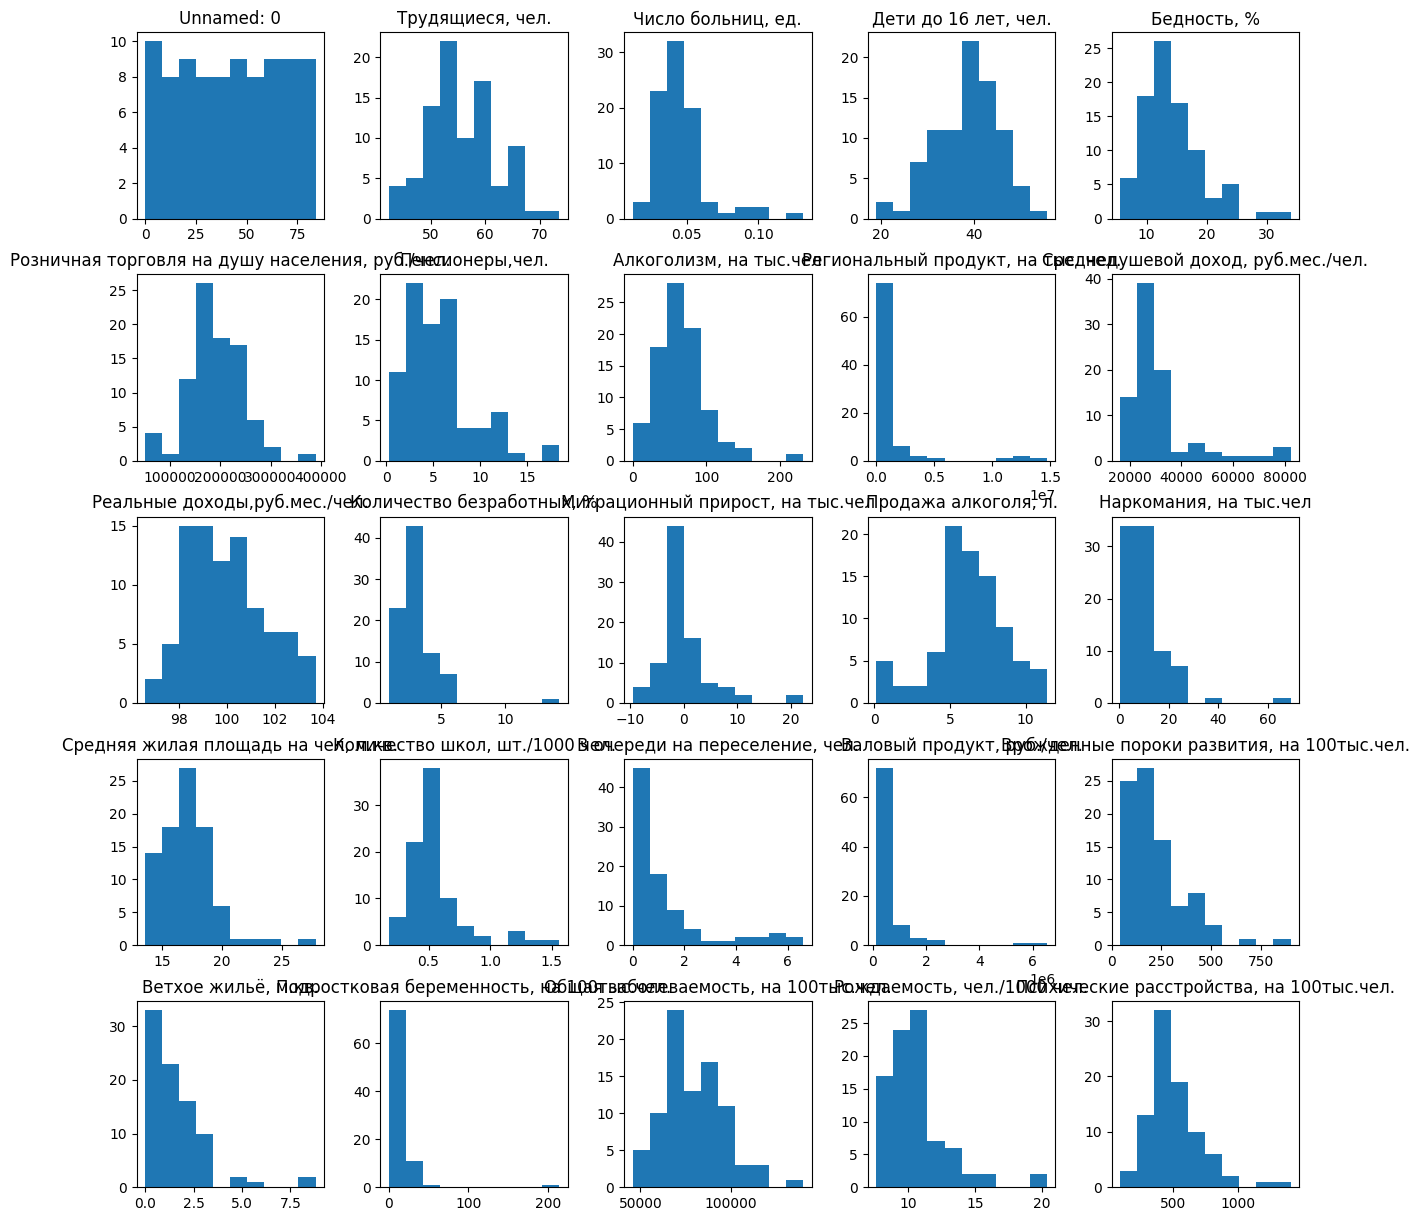

In [23]:
regions.hist(figsize = (15,15), grid = False)
plt.show()

Не все гистограммы имеют симметричный вид, что подтверждает наличие нескольких групп признаков.

Тест Шапиро на нормальность распределения показывает, что только признак 'Дети до 16 лет' и 'Количество безработных' можно считать нормально распределенным.

In [24]:
for col in regions.columns:
    _, p = shapiro(regions[col])
    print(f'{col}:   p-value = {p:.3f}')

Unnamed: 0:   p-value = 0.003
Трудящиеся, чел.:   p-value = 0.471
Число больниц, ед.:   p-value = 0.000
Дети до 16 лет, чел.:   p-value = 0.724
Бедность, %:   p-value = 0.000
Розничная торговля на душу населения, руб./чел.:   p-value = 0.029
Пенсионеры,чел.:   p-value = 0.000
Алкоголизм, на тыс.чел:   p-value = 0.000
Региональный продукт, на тыс. чел.:   p-value = 0.000
Среднедушевой доход, руб.мес./чел.:   p-value = 0.000
Реальные доходы,руб.мес./чел.:   p-value = 0.046
Количество безработных, %:   p-value = 1.000
Миграционный прирост, на тыс.чел:   p-value = 0.000
Продажа алкоголя, л.:   p-value = 0.020
Наркомания, на тыс.чел:   p-value = 0.000
Средняя жилая площадь на чел, м.кв.:   p-value = 0.000
Количество школ, шт./1000 чел.:   p-value = 0.000
В очереди на переселение, чел.:   p-value = 0.000
Валовый продукт, руб./чел.:   p-value = 0.000
Врожденные пороки развития, на 100тыс.чел.:   p-value = 0.000
Ветхое жильё, м.кв.:   p-value = 0.000
Подростковая беременность, на 100тыс.чел.: 

Создадим тепловую карту, визуализирующую значения матрицы корреляции всех пар переменных

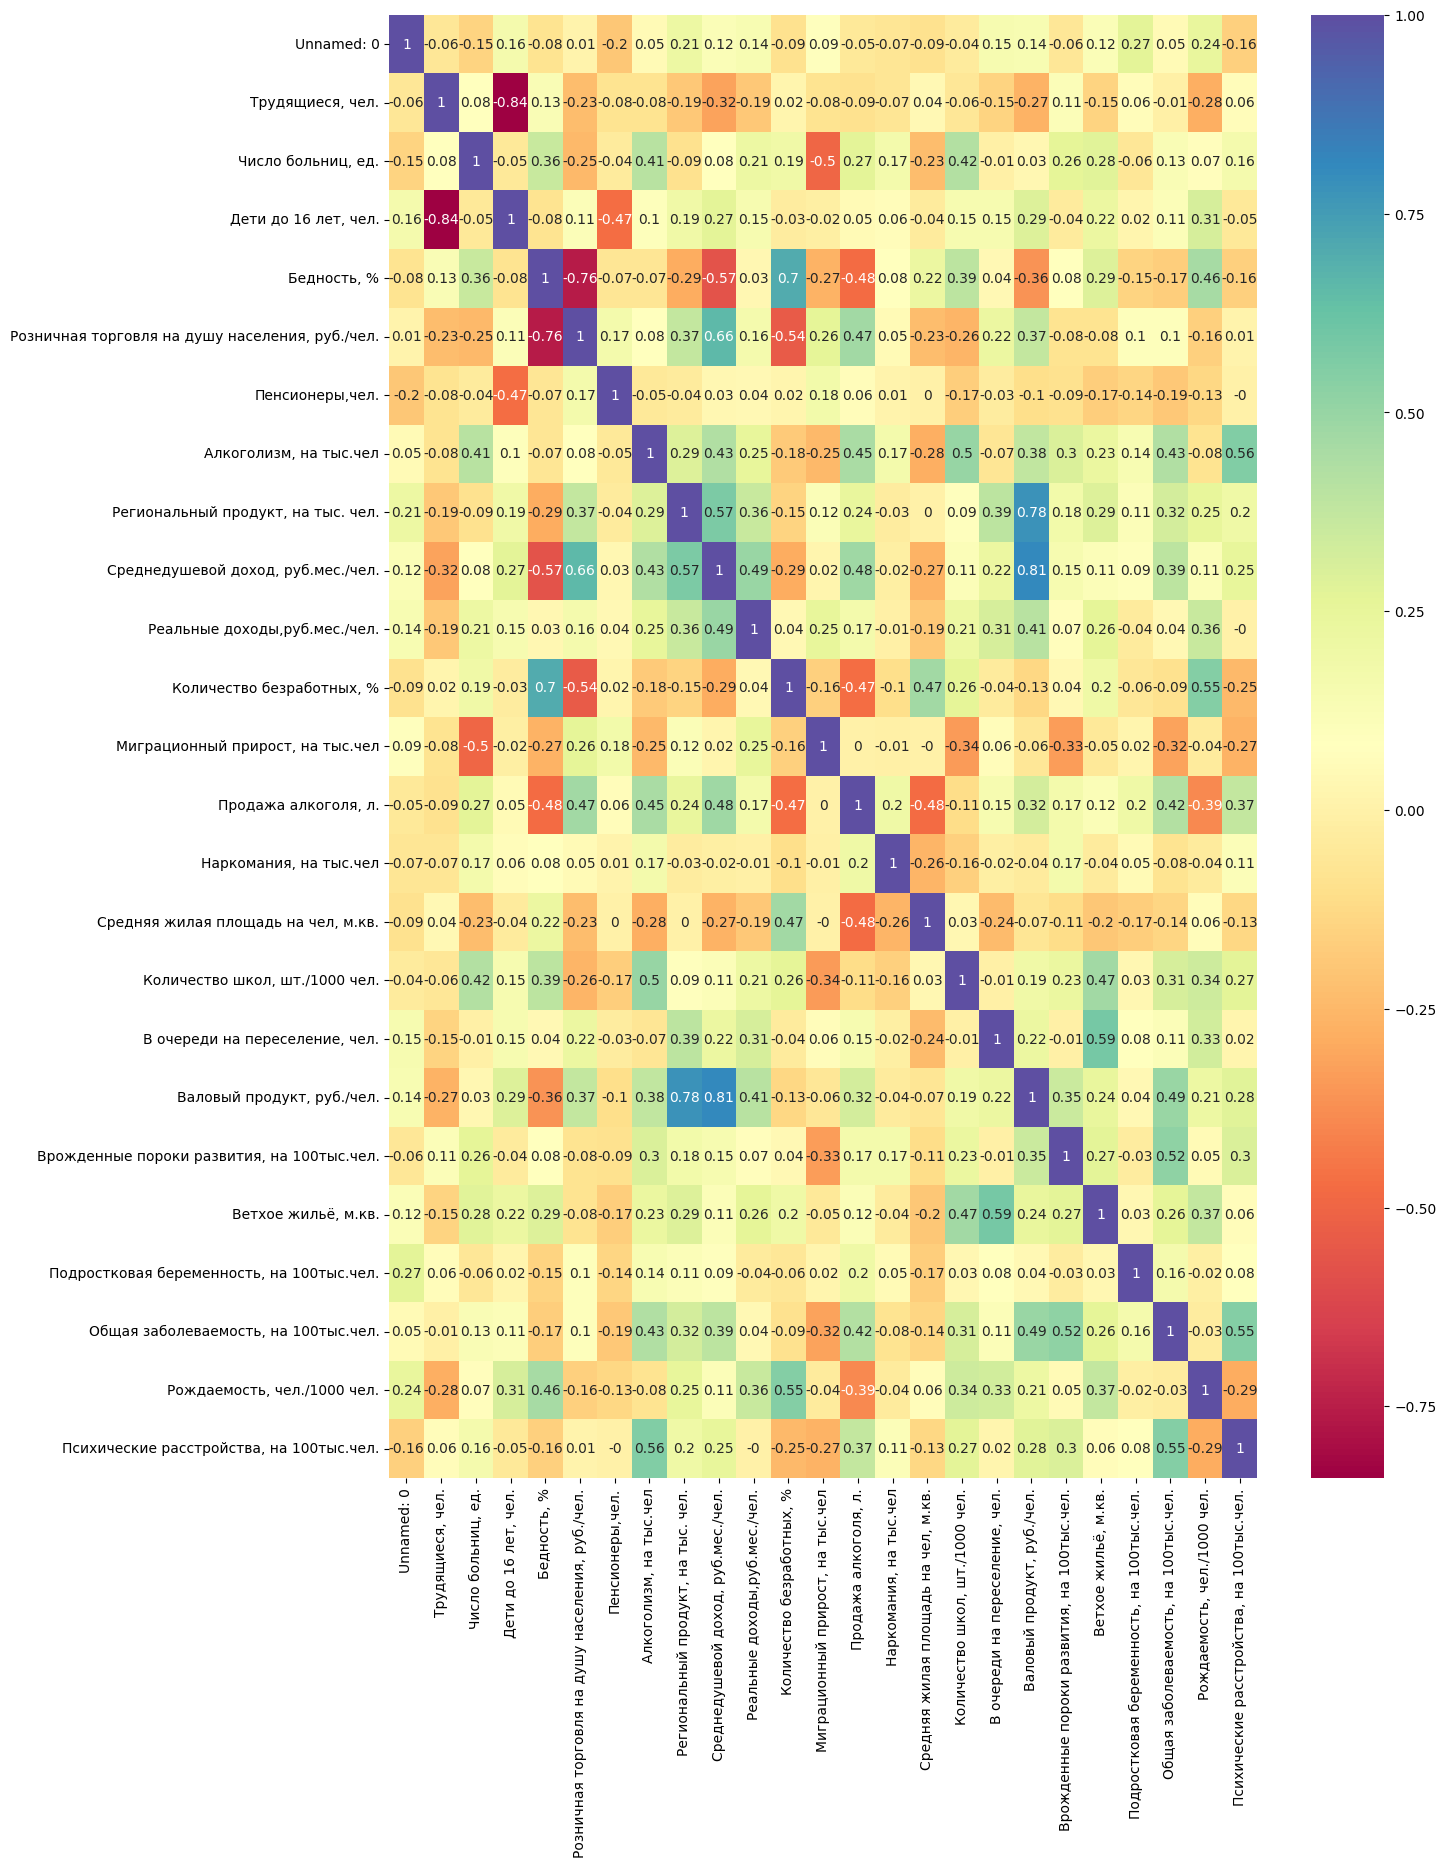

In [25]:
plt.figure(figsize=(14, 19))
sns.heatmap(regions.corr().round(decimals=2), cmap= "Spectral", annot=True)
plt.show()

Как и ранее на тепловой карте корреляции, видно, что пары переменных имеют сильную линейную связь, а другие - обратную линейную связь. Так доходы населения обратно связаны с расходами на соц. политику.

Исходя из тепловой карты уберем признаки кореллирующие друг с другом. Это - Дети, показатели бедности, продажи алкоголя, валовый продукт.

In [26]:
result_s = regions[[
    'Алкоголизм, на тыс.чел', 
    'Бедность, %', 
    'Дети до 16 лет, чел.', 
    'Число больниц, ед.' ,
    'Валовый продукт, руб./чел.'
    ]]
print(result_s.shape)

(87, 6)


Перед кластеризацией выполним стандартизацию признаков. Так как признаки датасета имеют большие различия между своими диапазонами, и для моделей машинного обучения, основанных на вычислении дистанции между точками на графике, это спровоцирует искаженное восприятие данных. \
Для удобства обернём эти шаги по предобработке данных в pipeline.

In [27]:
pipe = Pipeline([('scaler', preprocessing.StandardScaler()), ('pca', decomposition.PCA(n_components=2))])
pipe = pipe.fit(result_s)
table_processed = pipe.transform(result_s)
rfm_table_processed = pd.DataFrame(data = table_processed, columns = ['axis-1', 'axis-2'])

<AxesSubplot: xlabel='axis-1', ylabel='axis-2'>

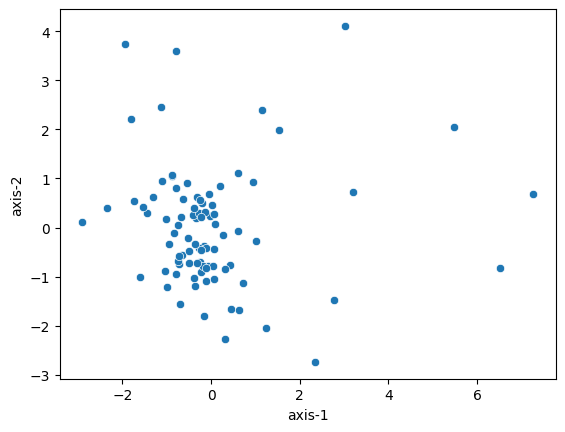

In [28]:
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2')

Попробуем разделить это пространство главных компонент на сегменты. 

Попробуем воспользоваться методом k-means. 

In [29]:
#проходимся циклом по всем нужным нам значениям количества кластеров
for i in range(2,10):
	# обучаем модель k-means с текущим количеством кластеров
    km = cluster.KMeans(n_clusters = i , random_state = 42 ).fit(rfm_table_processed)
	#предсказываем метки
    y_pred = km.labels_
	#выводим результат для коэффициента силуэта
    print (i, metrics.silhouette_score(rfm_table_processed,  y_pred))

2 0.6722994419035891
3 0.3705510896940297
4 0.36345031171775866
5 0.38272989134735663
6 0.3944247090358948
7 0.41198129584061305
8 0.40606166495845536
9 0.3576654355077812


Теперь возьмём EM-алгоритм.

In [30]:
#проходимся циклом по всем нужным нам значениям количества кластеров
for j in range(2,10):
	# обучаем модель k-means с текущим количеством кластеров
    gm = mixture.GaussianMixture(n_components = j , random_state = 42 ).fit(rfm_table_processed)
	#предсказываем метки
    y_pred_Gaussian = gm.predict(rfm_table_processed)
	#выводим результат для коэффициента силуэта
    print (j, metrics.silhouette_score(rfm_table_processed,  y_pred_Gaussian))

2 0.5238145114858487
3 0.39377250386537394
4 0.3392848773843634
5 0.4275824614545405
6 0.335320718324417
7 0.3434367618516438
8 0.33300339162969966
9 0.3349120739145004


Лучшая модель K-Means, т.к. в нем коэффициент силуэта наибольший 0.58
Обучим модель с подобранным ранее количеством кластеров на декомпозированных данных.

In [31]:
kmeans = cluster.KMeans(n_clusters=2, random_state=42)
kmeans.fit(rfm_table_processed)
rfm_table_processed.loc[:, 'Label'] = kmeans.labels_
rfm_table_processed['Label'].value_counts()

1    81
0     6
Name: Label, dtype: int64

Визуализируем результаты кластеризации:

<AxesSubplot: xlabel='axis-1', ylabel='axis-2'>

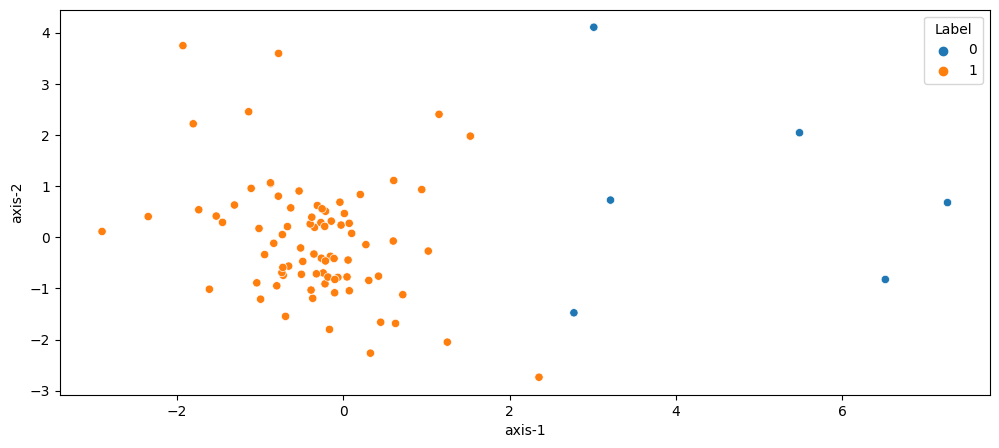

In [32]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=rfm_table_processed, 
    x='axis-1', 
    y='axis-2', 
    hue='Label',
)

Итак, у нас есть два кластера. Давайте посмотрим статистику по ним.  

In [33]:
result_s.loc[:, 'KMeans_label'] = kmeans.labels_

In [34]:
cluster_1 = list(result_s[result_s['KMeans_label']==1].index)
print (', '.join(cluster_1))
result_s.loc[result_s['KMeans_label'] == 1].describe()

Алтайский край, Амурская область, Архангельская область без Ненецкого АО, Архангельская область без Ненецкого АО, Астраханская область, Белгородская область, Брянская область, Владимирская область, Волгоградская область, Вологодская область, Воронежская область, Еврейская автономная область, Забайкальский край, Ивановская область, Иркутская область, Кабардино-Балкарская Республика, Калининградская область, Калужская область, Камчатский край, Карачаево-Черкесская Республика, Кемеровская область, Кировская область, Костромская область, Краснодарский край, Красноярский край, Курганская область, Курская область, Ленинградская область, Липецкая область, Москва, Московская область, Мурманская область, Нижегородская область, Новгородская область, Новосибирская область, Омская область, Оренбургская область, Орловская область, Пензенская область, Пермский край, Приморский край, Псковская область, Республика Адыгея, Республика Алтай, Республика Башкортостан, Республика Бурятия, Республика Дагест

,"Среднедушевой доход, руб.мес./чел.","Алкоголизм, на тыс.чел","Бедность, %","Дети до 16 лет, чел.","Число больниц, ед.","Валовый продукт, руб./чел.",KMeans_label
count,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01,81.0
mean,28361.126543,61.511728,14.676852,38.060494,0.043968,4.536470e+05,1.0
std,8186.637430,26.573160,4.962471,6.392196,0.016545,2.207581e+05,0.0
min,16363.750000,0.100000,6.525000,19.000000,0.011937,1.376303e+05,1.0
25%,23610.250000,44.600000,12.100000,33.800000,0.033775,3.048324e+05,1.0
50%,26826.750000,60.000000,13.825000,39.000000,0.042242,4.217385e+05,1.0
75%,30851.250000,77.700000,16.775000,42.600000,0.049747,5.202768e+05,1.0
max,71807.750000,133.950000,34.000000,49.900000,0.106516,1.486806e+06,1.0


In [35]:
cluster_0 = list(result_s[result_s['KMeans_label']==0].index)
print (', '.join(cluster_0))
result_s.loc[result_s['KMeans_label'] == 0].describe()

Магаданская область, Ненецкий автономный округ, Сахалинская область, Ханты-Мансийский автономный округ - Югра, Чукотский автономный округ, Ямало-Ненецкий автономный округ


,"Среднедушевой доход, руб.мес./чел.","Алкоголизм, на тыс.чел","Бедность, %","Дети до 16 лет, чел.","Число больниц, ед.","Валовый продукт, руб./чел.",KMeans_label
count,6.0000,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.0
mean,68836.0000,129.191667,8.462500,45.783333,0.061624,3.276252e+06,0.0
std,13623.5082,64.119072,1.539947,8.404146,0.035888,2.083197e+06,0.0
min,51800.5000,41.950000,5.550000,30.700000,0.033436,1.476716e+06,0.0
25%,57690.8750,97.375000,8.412500,45.075000,0.041226,1.934713e+06,0.0
50%,70949.2500,128.675000,8.700000,46.250000,0.050365,2.272697e+06,0.0
75%,80688.8125,150.300000,9.475000,49.975000,0.062138,4.538491e+06,0.0
max,82110.2500,231.400000,9.775000,55.600000,0.131338,6.519595e+06,0.0


Видно, что в 1 кластер попали регионы с самым высоким среднедушевым доходом и низким уровнем безработицы в 0 кластер напротив среднедушевой доход в 2 раза меньше чем в 1 кластере. При этом мы видим заболеваемость впервые в жизни установленным диагнозом алкоголизма в среднем в 1 кластере превышает в 2 раза нулевой кластер. Данное разбиение не совсем укладывается в нашу цель поиска наиболее остро нуждаются в помощи малообеспеченным/неблагополучным слоям населения.

Воспользуемся алгоритмом t-SNE так же для удобства обернём шаги по предобработке данных в pipeline.

In [36]:
result_s.drop('KMeans_label', axis=1, inplace=True)

In [37]:
pipeline = Pipeline([('scaler', preprocessing.StandardScaler()), ('t-SNE', manifold.TSNE(n_components=2, perplexity=3, random_state=100))])
rfm_table_processed = pipeline.fit_transform(result_s)
print('Значение дивергенции Кульбака — Лейблера для обученного алгоритма t-SNE равно', round(pipeline[1].kl_divergence_, 2))
rfm_table_processed = pd.DataFrame(rfm_table_processed, columns=['axis-1', 'axis-2'])

Значение дивергенции Кульбака — Лейблера для обученного алгоритма t-SNE равно 0.48


Значение дивергенции Кульбака - Лейблера (KL) для алгоритма t-Distributed Stochastic Neighbor Embedding (t-SNE) показывает степень сжатия данных в проекции. Чем меньше значение KL, тем сильнее данные сжимаются в проекции, что может означать, что t-SNE нашел более эффективное отображение данных. Однако слишком малое значение KL может привести к потере информации и неспособности различить отдельные кластеры. 

Визуализировав пространство после декомпозиции с помощью t-SNE, мы получим следующую картину:

<AxesSubplot: xlabel='axis-1', ylabel='axis-2'>

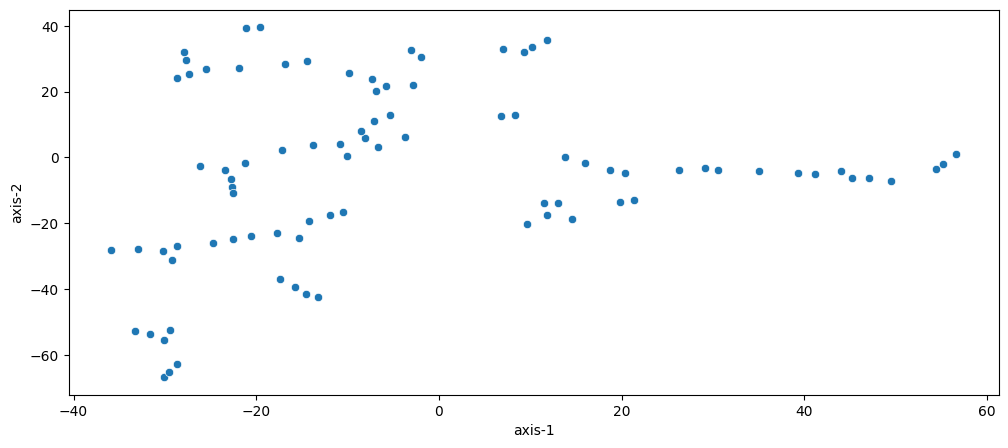

In [38]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2')

Как и ожидалось от t-SNE, алгоритм сгруппировал наиболее похожие объекты в подобие кластеров, причём эти кластеры легко определить.

0.5


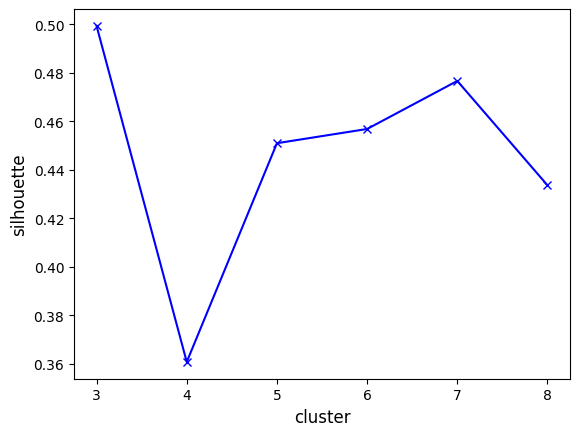

In [39]:
def get_silhouette(n_components, data):
    em_model = mixture.GaussianMixture(n_components=n_components, random_state=42)
    em_model.fit(data)
    labels = em_model.predict(data)
    silhouette = metrics.silhouette_score(data, labels)
    return silhouette

silhouette_list = []
for n_components in range(3, 9):
        silhouette_list.append(get_silhouette(n_components, rfm_table_processed))

plt.plot([i for i in range(3, 9)], silhouette_list, 'xb-')
plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
print(np.round(np.max(silhouette_list),2))

0.53


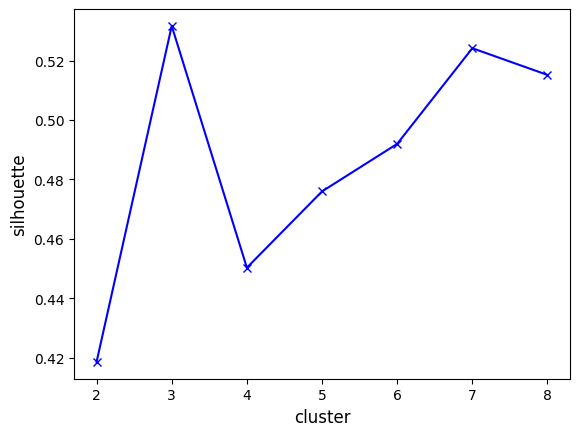

In [40]:
def get_silhouette(n_clusters, data):
    agg_clustering = cluster.AgglomerativeClustering(n_clusters=n_clusters)
    agg_clustering.fit(data)
    silhouette = metrics.silhouette_score(data, agg_clustering.labels_)
    return silhouette

silhouette_list = []
for n_clusters in range(2, 9):
        silhouette_list.append(get_silhouette(n_clusters, rfm_table_processed))

plt.plot([i for i in range(2, 9)], silhouette_list, 'xb-')
plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
print(np.round(np.max(silhouette_list),2))

Лучшая модель AgglomerativeClustering, т.к. в нем коэффициент силуэта наибольший 0.5
Обучим модель с подобранным ранее количеством кластеров на декомпозированных данных.

In [41]:
agg_clustering = cluster.AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(rfm_table_processed)
labels = agg_clustering.labels_

Визуализируем результаты кластеризации:

<AxesSubplot: xlabel='axis-1', ylabel='axis-2'>

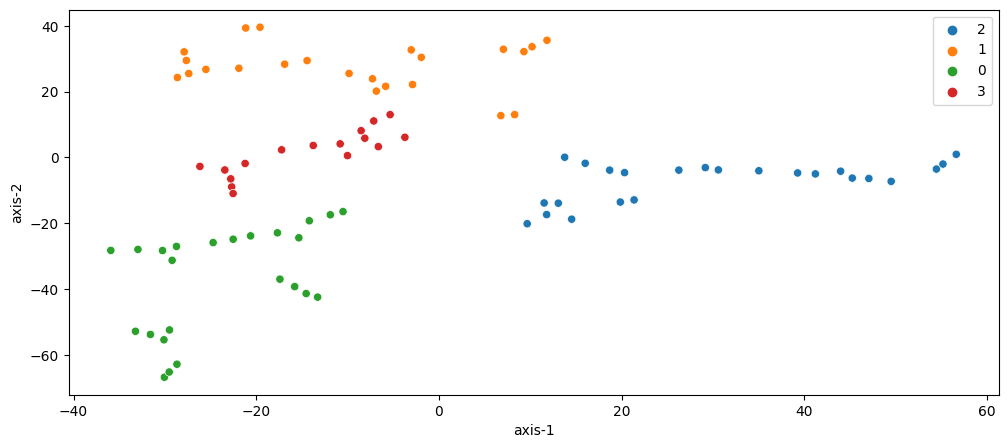

In [42]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2', hue=agg_clustering.labels_.astype('str'))

Мы видим, что первый кластер вдали от всех остальных

In [43]:
result_s['Cluster'] = labels
result_s['Cluster'].value_counts()

2    24
0    24
1    23
3    16
Name: Cluster, dtype: int64

In [44]:
cluster_0 = list(result_s[result_s['Cluster']==0].index)
print (', '.join(cluster_0))
result_s.loc[result_s['Cluster'] == 0].describe()

Астраханская область, Владимирская область, Кемеровская область, Кировская область, Костромская область, Краснодарский край, Липецкая область, Новгородская область, Новосибирская область, Омская область, Республика Башкортостан, Республика Бурятия, Республика Дагестан, Республика Северная Осетия-Алания, Ростовская область, Рязанская область, Самарская область, Саратовская область, Ставропольский край, Тульская область, Тюменская область без округов, Тюменская область без округов, Челябинская область, Чеченская Республика


,"Среднедушевой доход, руб.мес./чел.","Алкоголизм, на тыс.чел","Бедность, %","Дети до 16 лет, чел.","Число больниц, ед.","Валовый продукт, руб./чел.",Cluster
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,26620.208333,46.050000,13.729167,39.141667,0.038062,409521.968750,0.0
std,3174.921683,19.615904,2.544705,2.500942,0.010639,152431.649342,0.0
min,22117.500000,3.550000,8.625000,34.100000,0.024864,160454.075000,0.0
25%,24112.375000,29.987500,12.800000,37.900000,0.029624,300287.637500,0.0
50%,25903.875000,49.725000,13.775000,39.250000,0.037644,399792.325000,0.0
75%,29587.500000,62.762500,14.475000,40.225000,0.042659,454209.556250,0.0
max,35071.500000,72.150000,20.575000,43.900000,0.065180,794825.425000,0.0


In [45]:
cluster_1 = list(result_s[result_s['Cluster']==1].index)
print (', '.join(cluster_1))
result_s.loc[result_s['Cluster'] == 1].describe()

Амурская область, Белгородская область, Еврейская автономная область, Камчатский край, Курганская область, Магаданская область, Московская область, Мурманская область, Ненецкий автономный округ, Республика Алтай, Республика Калмыкия, Республика Карелия, Республика Коми, Республика Саха (Якутия), Республика Татарстан, Республика Тыва, Республика Хакасия, Сахалинская область, Свердловская область, Хабаровский край, Ханты-Мансийский автономный округ - Югра, Чукотский автономный округ, Ямало-Ненецкий автономный округ


,"Среднедушевой доход, руб.мес./чел.","Алкоголизм, на тыс.чел","Бедность, %","Дети до 16 лет, чел.","Число больниц, ед.","Валовый продукт, руб./чел.",Cluster
count,23.000000,23.000000,23.000000,23.000000,23.000000,2.300000e+01,23.0
mean,41680.141304,90.656522,14.319565,42.569565,0.060009,1.267785e+06,1.0
std,19811.173550,45.681492,7.213919,5.965769,0.027610,1.586993e+06,0.0
min,16552.500000,39.950000,5.550000,30.700000,0.022140,2.315193e+05,1.0
25%,27885.625000,54.825000,8.700000,39.200000,0.042646,4.653346e+05,1.0
50%,37103.250000,81.050000,12.225000,43.700000,0.053598,6.361358e+05,1.0
75%,51165.875000,106.275000,18.512500,45.300000,0.073403,1.309774e+06,1.0
max,82110.250000,231.400000,34.000000,55.600000,0.131338,6.519595e+06,1.0


In [46]:
cluster_2 = list(result_s[result_s['Cluster']==2].index)
print (', '.join(cluster_2))
result_s.loc[result_s['Cluster'] == 2].describe()

Алтайский край, Архангельская область без Ненецкого АО, Архангельская область без Ненецкого АО, Воронежская область, Забайкальский край, Кабардино-Балкарская Республика, Калининградская область, Калужская область, Карачаево-Черкесская Республика, Красноярский край, Курская область, Ленинградская область, Москва, Нижегородская область, Псковская область, Республика Ингушетия, Республика Марий Эл, Республика Мордовия, Санкт-Петербург, Смоленская область, Тамбовская область, Тверская область, Чувашская Республика, Ярославская область


,"Среднедушевой доход, руб.мес./чел.","Алкоголизм, на тыс.чел","Бедность, %","Дети до 16 лет, чел.","Число больниц, ед.","Валовый продукт, руб./чел.",Cluster
count,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.0
mean,28820.229167,55.804167,14.823958,30.808333,0.041723,4.583384e+05,2.0
std,11145.491413,23.451823,6.052791,4.639332,0.011091,2.866919e+05,0.0
min,16363.750000,0.100000,6.525000,19.000000,0.011937,1.376303e+05,2.0
25%,22686.375000,43.700000,10.056250,28.500000,0.037332,2.929989e+05,2.0
50%,27656.375000,58.150000,13.575000,31.250000,0.042516,3.928946e+05,2.0
75%,31132.812500,74.837500,17.675000,33.675000,0.049243,4.918070e+05,2.0
max,71807.750000,89.550000,30.125000,38.400000,0.059092,1.486806e+06,2.0


In [47]:
cluster_3 = list(result_s[result_s['Cluster']==3].index)
print (', '.join(cluster_3))
result_s.loc[result_s['Cluster'] == 3].describe()

Брянская область, Волгоградская область, Вологодская область, Ивановская область, Иркутская область, Оренбургская область, Орловская область, Пензенская область, Пермский край, Приморский край, Республика Адыгея, Республика Крым, Севастополь, Томская область, Удмуртская Республика, Ульяновская область


,"Среднедушевой доход, руб.мес./чел.","Алкоголизм, на тыс.чел","Бедность, %","Дети до 16 лет, чел.","Число больниц, ед.","Валовый продукт, руб./чел.",Cluster
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0
mean,26315.843750,76.750000,14.060937,43.731250,0.039754,400951.475000,3.0
std,3372.130842,22.135522,1.753306,4.362525,0.007515,123960.563294,0.0
min,21664.000000,42.550000,11.075000,32.700000,0.026738,236429.900000,3.0
25%,23803.750000,56.650000,13.193750,41.500000,0.033996,306705.100000,3.0
50%,25449.875000,80.625000,13.812500,43.850000,0.042232,359411.925000,3.0
75%,27945.750000,93.362500,14.375000,46.525000,0.044779,522903.387500,3.0
max,35268.750000,120.100000,17.775000,49.900000,0.049747,603108.650000,3.0


Следует обратить внимание на кластер 1 по сравнению с другими кластерами в данном кластере наблюдается в среднем самый большой показатель людей ,живущих за чертой бедности, высокая безработица, низкие среднедушевые денежные доходы. Ключевой особенностью являются минимальные показатели наркомании, алкоголизма и заболеваемости в целом. Также отметим, что данный кластер получает самую большую долю расходов на социальную политику. 
<b>*Регионы именно этого кластера нуждаются в помощи в первую очередь.*</b>

Мы построили модель кластеризации. Чтобы сделать предсказание давайте сведём задачу кластеризации к задаче классификации. Действительно, у нас теперь есть истинные метки кластеров.

In [48]:
X = result_s.drop(['Cluster'], axis=1)
y = result_s[['Cluster']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 42, test_size = 0.2)

In [49]:
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}

grid_RFC = model_selection.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(
        random_state=42), 
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

y_pred_test = grid_RFC.fit(X_train, y_train).predict(X_test)
print("Best parameters:",grid_RFC.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test).round(3))

Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 500}
Accuracy: 0.944


In [50]:
param_grid = {
    'max_depth': range(3, 7),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}
grid_GBC= model_selection.GridSearchCV(
    estimator=ensemble.GradientBoostingClassifier(
        random_state=42), 
    param_grid=param_grid,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1
)

y_pred_test = grid_GBC.fit(X_train, y_train).predict(X_test)
print("Best parameters:", grid_GBC.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test).round(3))

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.778


In [ ]:
# Сохранение выбранной обученной модели в файл pickle
with open("social_data\Test\grid_GBC.pkl", "wb") as f:
    pickle.dump(grid_GBC, f)

In [ ]:
# Загрузка сохраненной модели из файла pickle
with open("social_data\Test\grid_GBC.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [ ]:
# создадим тестовый набор 
data = [
    ('168811', '28222.4' ,'0.000044', '1.73', '678764', '5.68', '11.74', '216128.2', 
     '19.050', '8.175', '17.775', '483.14', '16.28', '0.0003', '0.010295', '2.19', '41.2', '3895.8', 
     '799.6', '71637.4', '16.4'),
    ('1.288930e+06', '26533.0','0.000053', '1.001405', '304715.44', '13.92', '23.76', '206798.0',
     '41.375', '3.875', '54.775', '190.684667', '14.387151', '0.000000', '0.010074', '10.000000',
     '94.100000', '3201.2', '1641.5', '77439.0', '24.1')
]

columns = ['population', 'cash_income', 'child_mort', 'disabled', 'grp',
       'poverty_%', 'Social_expenses_%', 'retail', 'poverty_deti_%',
       'poverty_pens_%', 'poverty_trud_%', 'rep_manufacture', 'rep_electro',
       'unemployed', 'borned', 'drug', 'alco', 'd_blood', 'd_endo', 'd_all',
       'square_liv']

df_test = pd.DataFrame(data, columns=columns)

df_test.head()

In [ ]:
y_pred = loaded_model.predict(df_test)
print(y_pred)

# Вывод

Проведен анализ социально-демографических групп населения, показывающий, что наиболее уязвимой группой населения по финасовым показателям являются семьи с детьми из регионов кластера 1 (Республика Адыгея (Адыгея), Республика Дагестан, Республика Ингушетия, Кабардино-Балкарская Республика, Карачаево-Черкесская Республика, Республика Северная Осетия — Алания, Чеченская Республика, Ставропольский край, Республика Алтай, Республика Тыва (Тува), Республика Бурятия, Забайкальский край). При этом в кластере наиболее бедных регионов наблюдается аномально высокая рождаемость, необеспеченная доходами родителей. В остальных группах рождаемость слабо растет с ростом финансового благополучия. Так же была обучена модель машинного обучения для данных которые не попали в выборку. 